# London Airbnb Exploratory Data Analysis

This project performs EDA on a small London Airbnb dataset. 
We will clean the data, visualize it, and draw insights.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("london_airbnb.csv")
df.head()


,location,price,rooms
0,Camden,120.0,1.0
1,Camden,150.0,2.0
2,Hackney,90.0,1.0
3,Westminster,200.0,3.0
4,Hackney,NaN,2.0


In [6]:
# Clean data
# We removed missing values and kept only relevant columns for
# analysis
# Remove missing valiues
df_clean = df.dropna()


# Keep only necessary columns
df_clean = df_clean[['location', 'price', 'rooms']]

df_clean.head()

,location,price,rooms
0,Camden,120.0,1.0
1,Camden,150.0,2.0
2,Hackney,90.0,1.0
3,Westminster,200.0,3.0


In [7]:
# Exploratory Data Analysis

# shows mean, min, max, and standard deviation for price and rooms.
df_clean.describe()

,price,rooms
count,4.000000,4.000000
mean,140.000000,1.750000
std,46.904158,0.957427
min,90.000000,1.000000
25%,112.500000,1.000000
50%,135.000000,1.500000
75%,162.500000,2.250000
max,200.000000,3.000000


In [8]:
# Missing Values Check

df_clean.isnull().sum()

location    0
price       0
rooms       0
dtype: int64

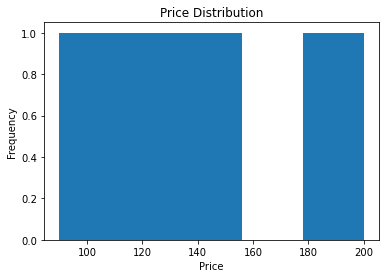

In [9]:
# Visualizations

# Histogram of Price

plt.figure()
plt.hist(df_clean['price'], bins = 5)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

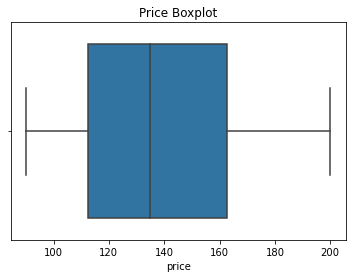

In [10]:
# Boxplot for Outliers

plt.figure()
sns.boxplot(x=df_clean['price'])
plt.title("Price Boxplot")
plt.show()

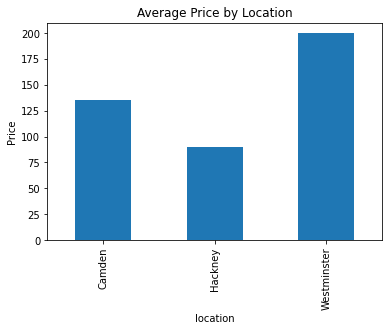

In [11]:
# Average Price per Location (Bar Chart )

plt.figure()
avg_price = df_clean.groupby("location")["price"].mean()
avg_price.plot(kind = "bar")
plt.title("Average Price by Location")
plt.ylabel("Price")
plt.show()

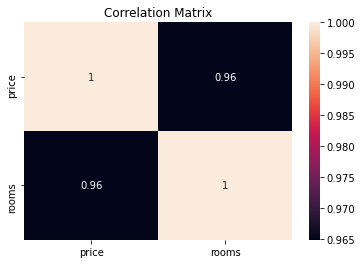

In [12]:
# Correlation Matrix (Numeric Columns Only)
# Correlation only works on numbers
# Annot helps to write the actual correlation numbers inside each box


numeric_df = df_clean.select_dtypes(include = ['float64', 'int64'])
plt.figure()
sns.heatmap(numeric_df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
# Conclusions

# - Camden has the highest average price.

# - Hackney has lower prices.

# - Price distribution shows some outliers (very high prices).

# - Numbers of rooms positively correlates with price.


# Optional Enhancement
# Add normalized price column

df_clean['price_normalized'] = (df_clean['price'] - df_clean['price'].min()) / (df_clean['price'].max() - df_clean['price'].min())




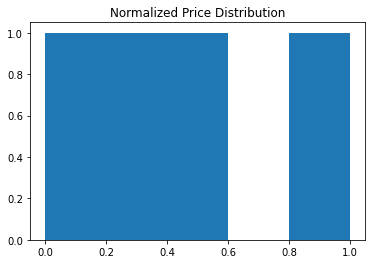

In [14]:
# Visualize the normalized price

plt.hist(df_clean['price_normalized'], bins = 5)
plt.title("Normalized Price Distribution")
plt.show()